In [9]:
from keras.datasets import imdb
from keras.layers import Dense, Flatten, SimpleRNN, Embedding
from keras.models import Sequential, Model
from keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

In [28]:
# 获取imdb数据
max_word = 10000
max_length = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_word)

# 对每条数据进行截断补齐
x_train = pad_sequences(x_train, maxlen = max_length, dtype = "int32", padding = "post", truncating = "post", value = 0)
x_test = pad_sequences(x_test, maxlen = max_length, dtype = "int32", padding = "post", truncating = "post", value = 0)

2494


In [29]:
# 构建模型SimpltRNN
embed_size = 32

model = Sequential()
model.add(Embedding(input_dim = max_word, output_dim = embed_size, input_length = max_length, embeddings_initializer = "glorot_uniform", name = "Embedding_1"))
model.add(SimpleRNN(units = 64, activation = "tanh", return_sequences = False, unroll = False, name = "RNN_1"))
model.add(Dense(units = 32, activation = "relu", name = "Dense_1"))
model.add(Dense(units = 1, activation = "sigmoid", name = "Dense_2"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
RNN_1 (SimpleRNN)            (None, 64)                6208      
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
Dense_2 (Dense)              (None, 1)                 33        
Total params: 328,321
Trainable params: 328,321
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 编译模型
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

# 训练模型
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 46s 3ms/step - loss: 0.6945 - acc: 0.4933 - val_loss: 0.6931 - val_acc: 0.5067
Epoch 2/10
17500/17500 [==============================] - 44s 3ms/step - loss: 0.6944 - acc: 0.5006 - val_loss: 0.6971 - val_acc: 0.4943
Epoch 3/10
17500/17500 [==============================] - 45s 3ms/step - loss: 0.6930 - acc: 0.5091 - val_loss: 0.6943 - val_acc: 0.5096
Epoch 4/10
17500/17500 [==============================] - 44s 3ms/step - loss: 0.6913 - acc: 0.5191 - val_loss: 0.6961 - val_acc: 0.5081
Epoch 5/10
17500/17500 [==============================] - 44s 3ms/step - loss: 0.6882 - acc: 0.5280 - val_loss: 0.6949 - val_acc: 0.4959
Epoch 6/10
17500/17500 [==============================] - 44s 3ms/step - loss: 0.6840 - acc: 0.5244 - val_loss: 0.7028 - val_acc: 0.4993
Epoch 7/10
17500/17500 [==============================] - 45s 3ms/step - loss: 0.6748 - acc: 0.5263 - val_loss: 0.6978 - val_acc:

In [31]:
# 测试模型
model.evaluate(x_test, y_test, verbose = 1)

25000/25000 [==============================] - 128s 5ms/step


[0.73079375795364376, 0.50371999999999995]

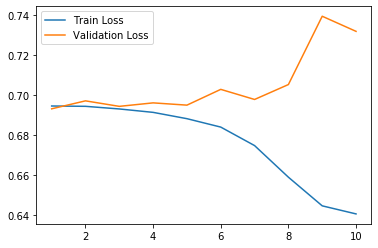

In [32]:
# 绘制结果
plt.figure()
epochs = [i for i in range(1, 11)]
plt.plot(epochs, history.history["loss"], label = "Train Loss")
plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

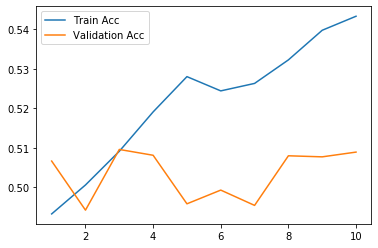

In [33]:
plt.figure()
plt.plot(epochs, history.history["acc"], label = "Train Acc")
plt.plot(epochs, history.history["val_acc"], label = "Validation Acc")
plt.legend()
plt.show()

### 分析：
训练效果相当不好，和普通猜测没什么打的区别。个人修改实验参数几次实验后，认为原因可能在与SimpleRNN的层数过多，导致梯度消失或者梯度爆炸，练训练集的误差和准确度都没有很好提升。